In [ ]:
from multiprocessing import Process, Queue
import threading
import time

def approximate_pi(n, results=None, idx=None):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    if results is not None and idx is not None:
        results[idx] = 2*pi_2
    elif results is not None:
        results.put(2*pi_2)
    else:
        return 2*pi_2

if __name__ == "__main__":
    nums = [1_822_725, 22_059_421, 32_374_695,
            88_754_320, 97_162_66, 200_745_654]
    ###############
    # Single Thread
    ###############
    start = time.time()

    results = []
    for n in nums:
        results.append([approximate_pi(n)])

    end = time.time()

    print("SINGLE THREAD Results:")
    print(f"Time taken: {end - start} seconds")
    for value in results:
        print(f"Value of pi: {value}")

    ################
    # Multithreading
    ################
    start = time.time()

    results = [None] * len(nums)

    jobs = []
    for idx, n in enumerate(nums):
        thread = threading.Thread(target=approximate_pi, args=(n, results, idx))
        jobs.append(thread)
        thread.start()

    for thread in jobs:
        thread.join()

    end = time.time()

    print("MULTITHREADING Results:")
    print(f"Time taken: {end - start} seconds")
    for value in results:
        print(f"Value of pi: {value}")


    #################
    # Multiprocessing
    #################
    start = time.time()

    queue = Queue()
    jobs = []
    for n in nums:
        proc = Process(target=approximate_pi, args=(n, queue))
        jobs.append(proc)
        proc.start()

    for proc in jobs:
        proc.join()

    results = []
    while not queue.empty():
        results.append(queue.get())

    end = time.time()

    print("MULTIPROCESSING Results:")
    print(f"Time taken: {end - start} seconds")
    for value in results:
        print(f"Value of pi: {value}")

    from multiprocessing import Pool
    start = time.time()
    with Pool() as pool:
        results = pool.map(approximate_pi, nums)
    end = time.time()

    print("MULTIPROCESSING Results:")
    print(f"Time taken: {end - start} seconds")
    for value in results:
        print(f"Value of pi: {value}")

SINGLE THREAD Results:
Time taken: 61.48158597946167 seconds
Value of pi: [3.1415935153733052]
Value of pi: [3.1415927247955033]
Value of pi: [3.1415927021077117]
Value of pi: [3.141592635888531]
Value of pi: [3.1415924919219385]
Value of pi: [3.141592645761164]
MULTITHREADING Results:
Time taken: 58.48017120361328 seconds
Value of pi: 3.1415935153733052
Value of pi: 3.1415927247955033
Value of pi: 3.1415927021077117
Value of pi: 3.141592635888531
Value of pi: 3.1415924919219385
Value of pi: 3.141592645761164
MULTIPROCESSING Results:
Time taken: 65.76258993148804 seconds
Value of pi: 3.1415935153733052
Value of pi: 3.1415924919219385
Value of pi: 3.1415927247955033
Value of pi: 3.1415927021077117
Value of pi: 3.141592635888531
Value of pi: 3.141592645761164
MULTIPROCESSING Results:
Time taken: 64.13297319412231 seconds
Value of pi: 3.1415935153733052
Value of pi: 3.1415927247955033
Value of pi: 3.1415927021077117
Value of pi: 3.141592635888531
Value of pi: 3.1415924919219385
Value of p

In [ ]:
import os
os.environ['NUMBA_NUM_THREADS'] = '10'
import numba as nb
import numpy as np

In [ ]:
@nb.jit(nopython=True)
def approximate_pi(n, results=None, idx=None):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    else:
        return 2*pi_2

if __name__ == "__main__":
    nums = [1_822_725, 22_059_421, 32_374_695,
            88_754_320, 97_162_66, 200_745_654]
    ###############
    # Single Thread
    ###############
    start = time.time()

    results = []
    for n in nums:
        results.append([approximate_pi(n)])

    end = time.time()

    print("SINGLE THREAD Results:")
    print(f"Time taken: {end - start} seconds")
    for value in results:
        print(f"Value of pi: {value}")

SINGLE THREAD Results:
Time taken: 0.820213794708252 seconds
Value of pi: [3.1415935153733052]
Value of pi: [3.1415927247955033]
Value of pi: [3.1415927021077117]
Value of pi: [3.141592635888531]
Value of pi: [3.1415924919219385]
Value of pi: [3.141592645761164]


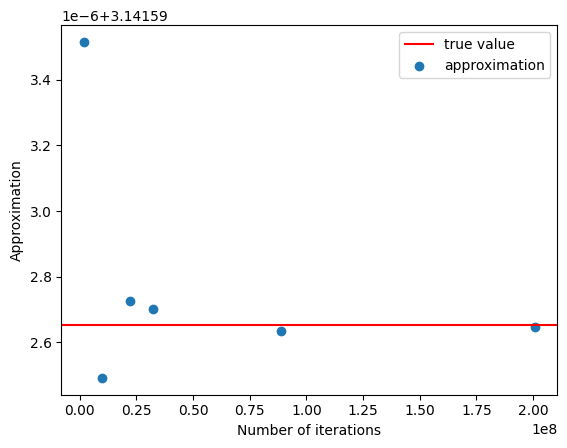

In [ ]:
import matplotlib.pyplot as plt

# specifying horizontal line type
plt.axhline(y = np.pi, color = 'r', linestyle = '-', label="true value")
plt.scatter(nums,results,label="approximation")
plt.xlabel("Number of iterations")
plt.ylabel("Approximation")
plt.legend()

# rendering the plot
plt.show()